## 1

In [1]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)

(150, 4)


In [3]:
U, s, W = np.linalg.svd(X)
V = W.T

D = np.zeros_like(X, dtype=float)
D[np.diag_indices(min(X.shape))] = s

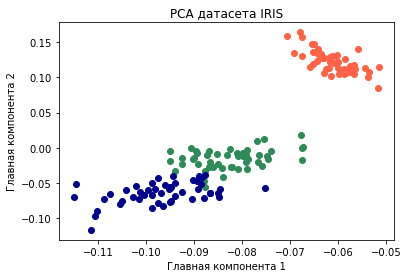

In [4]:
plt.figure()

for c, i in zip(['tomato', 'seagreen', 'darkblue'], [0, 1, 2]):
    plt.scatter(U[y==i, 0], U[y==i, 1], c=c)
    
    
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')

plt.show()

## 2

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix as cm

In [6]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, 
                                                                        y, 
                                                                        test_size = 0.2,
                                                                        random_state = 1)

In [8]:
clf = DecisionTreeClassifier()
clf.fit(train_data, train_labels)

y_pred = clf.predict(test_data)

print(f'Доля правильных ответов = {accuracy_metric(test_labels, y_pred):.2f}')

Доля правильных ответов = 96.67


In [9]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(U, 
                                                                        y, 
                                                                        test_size = 0.2,
                                                                        random_state = 1)

In [10]:
clf = DecisionTreeClassifier()
clf.fit(train_data, train_labels)

y_pred = clf.predict(test_data)

print(f'Доля правильных ответов = {accuracy_metric(test_labels, y_pred):.2f}')

Доля правильных ответов = 100.00


Вывод: PCA повышает точность классификации